In [67]:
import os
import csv
import fitz  
import pypdfium2 as pdfium
import pdftotext  
from tika import parser  
import time
import matplotlib.pyplot as plt
import numpy as np
import logging
import textract

In [68]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [81]:
def process_pdfs_textract(base_directory, output_csv):
    start_total_time = time.time()
    data = []
    pdf_id = 1

    for subdir, _, files in os.walk(base_directory):
        class_name = os.path.basename(subdir)

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)
                
                text = textract.process(pdf_path)
                text = text.decode('utf-8')
                data.append([pdf_id, text, class_name])
                pdf_id += 1

    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "text", "class"])
        writer.writerows(data)

    end_total_time = time.time()
    total_time = end_total_time - start_total_time

    return total_time


In [70]:
def process_pdfs_pymupdf(base_directory, output_csv):
    start_total_time = time.time()
    data = []
    pdf_id = 1

    for subdir, _, files in os.walk(base_directory):
        class_name = os.path.basename(subdir)

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)
                
                doc = fitz.open(pdf_path)
                text = ""
                for page_num in range(len(doc)):
                    page = doc.load_page(page_num)
                    text += page.get_text()

                data.append([pdf_id, text, class_name])
                pdf_id += 1

    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "text", "class"])
        writer.writerows(data)
    
    end_total_time = time.time()
    total_time = end_total_time - start_total_time

    return total_time

In [71]:
def process_pdfs_pypdfium2(base_directory, output_csv):
    start_total_time = time.time()
    data = []
    pdf_id = 1

    for subdir, _, files in os.walk(base_directory):
        class_name = os.path.basename(subdir)

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)
                
                pdf = pdfium.PdfDocument(pdf_path)
                text = ""
                for page_num in range(len(pdf)):
                    page = pdf.get_page(page_num)
                    text += page.get_textpage().get_text_range()

                data.append([pdf_id, text, class_name])
                pdf_id += 1

    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "text", "class"])
        writer.writerows(data)
    
    end_total_time = time.time()
    total_time = end_total_time - start_total_time

    return total_time


In [72]:
def process_pdfs_pdftotext(base_directory, output_csv):
    start_total_time = time.time()
    data = []
    pdf_id = 1

    for subdir, _, files in os.walk(base_directory):
        class_name = os.path.basename(subdir)

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)

                with open(pdf_path, "rb") as f:
                    pdf = pdftotext.PDF(f)
                text = "\n\n".join(pdf)

                data.append([pdf_id, text, class_name])
                pdf_id += 1

    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "text", "class"])
        writer.writerows(data)
    
    end_total_time = time.time()
    total_time = end_total_time - start_total_time

    return total_time


In [73]:
def process_pdfs_tika(base_directory, output_csv):
    start_total_time = time.time()
    data = []
    pdf_id = 1

    for subdir, _, files in os.walk(base_directory):
        class_name = os.path.basename(subdir)

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)
                
                raw = parser.from_file(pdf_path)
                text = raw['content'].strip() if raw and raw.get('content') else ''

                if text:
                    data.append([pdf_id, text, class_name])
                    pdf_id += 1

    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "text", "class"])
        writer.writerows(data)
    
    end_total_time = time.time()
    total_time = end_total_time - start_total_time

    return total_time


In [74]:
def plot_execution_times(results):
    libraries = [result[0] for result in results]
    times = [result[1] for result in results]
    sorted_data = sorted(zip(libraries, times), key=lambda x: x[1])
    libraries_sorted, times_sorted = zip(*sorted_data)
    plt.figure(figsize=(10, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(libraries_sorted)))
    bars = plt.bar(libraries_sorted, times_sorted, color=colors)
    for bar, time in zip(bars, times_sorted):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{time:.2f} s', ha='center', va='bottom', fontsize=8)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [75]:
results = []

In [76]:
timemu = process_pdfs_pymupdf("../model_training/helpers/data", "output_pymupdf.csv")
results.append(('pymupdf', timemu))

timefium = process_pdfs_pypdfium2("../model_training/helpers/data", "output_pypdfium2.csv")
results.append(('pypdfium2', timefium))



timepdfto = process_pdfs_pdftotext("../model_training/helpers/data", "output_pdftotext.csv")
results.append(('pdftotext', timepdfto))



timetika = process_pdfs_tika("../model_training/helpers/data", "output_tika.csv")
results.append(('tika', timetika))


In [77]:
timefium = process_pdfs_pypdfium2("../model_training/helpers/data", "output_pypdfium2.csv")
results.append(('pypdfium2', timefium))

/home/vini/Documentos/cv-indexing/.venv/lib/python3.12/site-packages/pypdfium2/_helpers/textpage.py:80: UserWarning: get_text_range() call with default params will be implicitly redirected to get_text_bounded()
  warnings.warn("get_text_range() call with default params will be implicitly redirected to get_text_bounded()")


In [78]:
timepdfto = process_pdfs_pdftotext("../model_training/helpers/data", "output_pdftotext.csv")
results.append(('pdftotext', timepdfto))

In [79]:
timetika = process_pdfs_tika("../model_training/helpers/data", "output_tika.csv")
results.append(('tika', timetika))

In [82]:
timeract = process_pdfs_textract("../model_training/helpers/data", "output_textract.csv")
results.append(('textract', timeract))

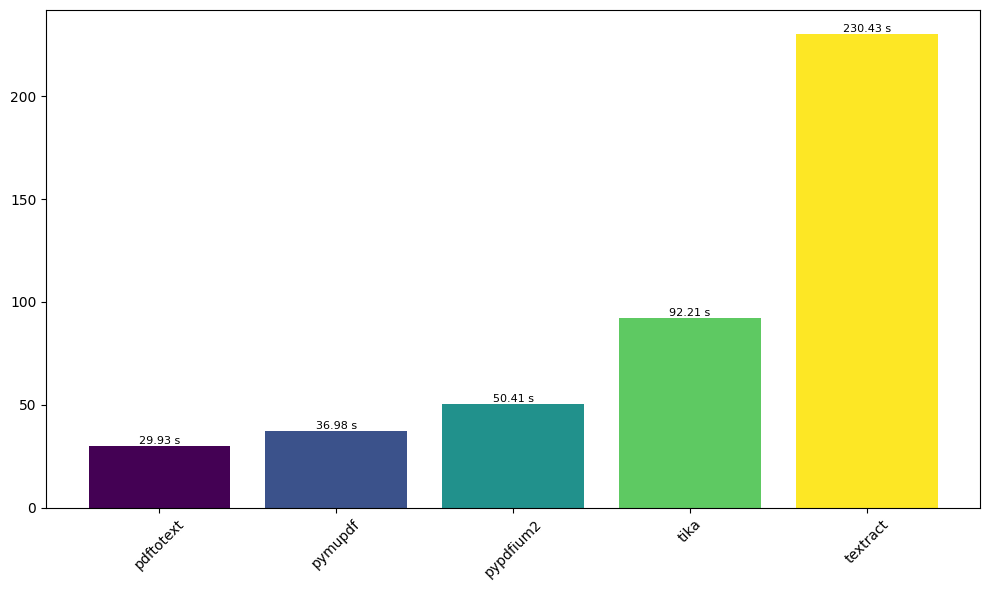

In [83]:
plot_execution_times(results)